In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/time_series_ass3.unknown')

In [ ]:
z_scores = (df['PM10 (µg/m3)'] - df['PM10 (µg/m3)'].mean()) / df['PM10 (µg/m3)'].std()
outlier_threshold = 3
df = df.loc[abs(z_scores) < outlier_threshold]

In [ ]:
df.loc[:, ['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)']] = df.loc[:, ['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)']].interpolate(method='linear')


In [ ]:
statistics = df[['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)']].describe()
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
       PM10 (µg/m3)  PM2.5 (µg/m3)   NO (µg/m3)
count   8640.000000    8640.000000  7636.000000
mean     177.463079      75.557350    14.524751
std      124.773568      54.826850    18.961752
min       12.000000       3.000000     0.100000
25%       97.000000      36.821429     3.900000
50%      151.900794      61.000000     6.100000
75%      215.000000     101.000000    16.600000
max      847.000000     474.000000   157.500000


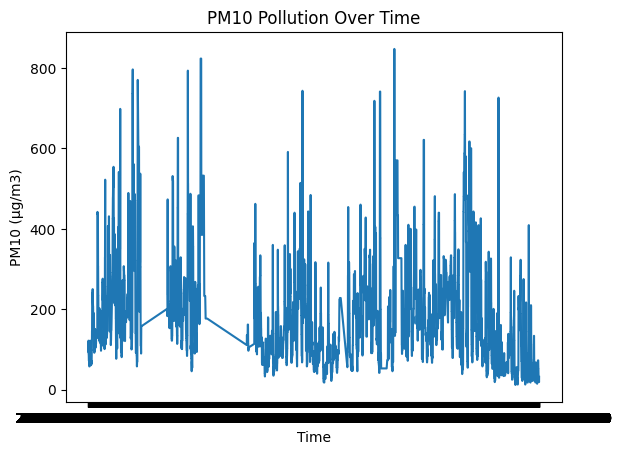

In [ ]:
plt.plot(df['From'], df['PM10 (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('PM10 (µg/m3)')
plt.title('PM10 Pollution Over Time')
plt.show()

In [ ]:
df['From'] = pd.to_datetime(df['From'], format='%Y-%m-%d %H:%M:%S')
df['To'] = pd.to_datetime(df['To (Interval: 15M)'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
interval_duration = df['To'] - df['From']
average_interval_duration = interval_duration.mean()

In [ ]:
df.set_index('From', inplace=True)

In [ ]:
df_resampled = df.resample(average_interval_duration).mean()


<ipython-input-9-ba04c4e5ec00>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(average_interval_duration).mean()


In [ ]:
df['PM10_diff'] = df['PM10 (µg/m3)'].diff().fillna(0)


In [ ]:
train_data = df['PM10 (µg/m3)'].dropna()
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


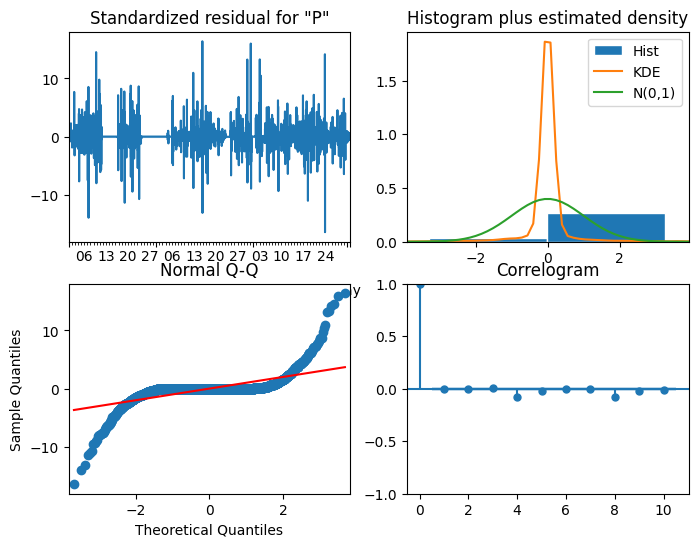

In [ ]:
model_fit.plot_diagnostics(figsize=(8, 6))
plt.show()

In [ ]:
forecast = model_fit.forecast(steps=10)

In [ ]:
print("Predicted PM10 values for the next 10 days:")
#forecast = model_fit.forecast(steps=10)
#print(forecast)
model_fit.forecast(steps=10)

Predicted PM10 values for the next 10 days:


2023-05-02 00:00:00    32.136382
2023-05-02 00:15:00    32.151568
2023-05-02 00:30:00    32.153258
2023-05-02 00:45:00    32.153447
2023-05-02 01:00:00    32.153468
2023-05-02 01:15:00    32.153470
2023-05-02 01:30:00    32.153470
2023-05-02 01:45:00    32.153470
2023-05-02 02:00:00    32.153470
2023-05-02 02:15:00    32.153470
Freq: 15T, Name: predicted_mean, dtype: float64

In [ ]:
test_data = df['PM10 (µg/m3)'].tail(10)  # Actual values for the next 10 days
predictions = forecast[0]
mse = ((test_data - predictions) ** 2).mean()
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 8.710533430743132
